In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
# Create the feature matrix(X) and the response vector(y)
X = iris.data
y = iris.target

## K-Fold Cross-validation
#### Goal: To select the best tuning parameters (hyperparameters) for KNN on the iris dataset

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# 10-fold cross-validation with K=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')# This means that we are using 'classification accuracy'
print(scores)                        

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


Basically, cross_val_score function executes the first four steps of the K-fold cross-validation

In [11]:
# We'll average the accuracy and take it as our final estimate
scores.mean()

0.9666666666666668

### Now, we'll search for the optimal value for 'K' in KNN

In [61]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)        

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


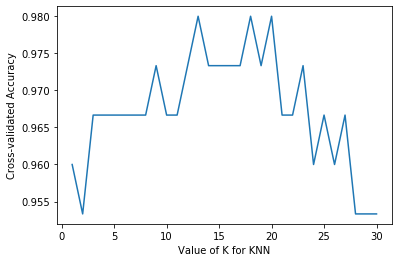

In [63]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()

As, higher values of 'K' produce less complexity in the model, so we'll choose K=20 in the model.

## Comparing best KNN model & Logistic Regression model with K-fold cross-validation 

In [64]:
# 10-fold cross-validation with the best KNN model(K=10)
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn,X,y,scoring='accuracy')
print(scores.mean())

0.9800000000000001


In [65]:
# 10-fold cross-validation with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg,X,y,scoring='accuracy')
print(scores.mean())

0.9733333333333334


c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### By this, we would conclude that KNN is a better choice than Logistic Regression for using K-fold cross-validation for this particular task.

## More efficient parameter tuning using GridsearchCV

#### It allows you to define a grid of parameters that will be searched using K-fold Cross-validation
#### Basically, it replaces the 'for loop' above for searching the optimal value for 'K' and also provides some additional functionality.

In [66]:
# importing the class
from sklearn.model_selection import GridSearchCV

In [67]:
# Define the parameter values that should be searched
k_range = range(1,31)
print(k_range)

range(1, 31)


In [69]:
# create a parameter grid: map the parameter names to the values that are to be searched 
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [70]:
# Instantiate the grid
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [71]:
# Fit the grid with the data
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [75]:
# View the entire results
grid.cv_results_

{'mean_fit_time': array([0.00130053, 0.00109997, 0.00120063, 0.00070057, 0.00090065,
        0.00080059, 0.00070031, 0.0008007 , 0.00080054, 0.00110068,
        0.00090044, 0.00110071, 0.00110006, 0.00110116, 0.00110044,
        0.00090058, 0.00110054, 0.00090067, 0.00070043, 0.00130088,
        0.00190117, 0.00230172, 0.0017014 , 0.00110056, 0.00180149,
        0.00130064, 0.00110023, 0.00150127, 0.00100048, 0.00080066]),
 'std_fit_time': array([4.58757045e-04, 3.00522078e-04, 3.99733528e-04, 4.58630313e-04,
        3.00216788e-04, 4.00293014e-04, 4.58458520e-04, 4.00354267e-04,
        4.00269109e-04, 3.00280325e-04, 3.00145263e-04, 3.00279792e-04,
        2.99455425e-04, 3.00123088e-04, 5.38911878e-04, 5.38862711e-04,
        5.38495467e-04, 5.38924702e-04, 4.58536536e-04, 6.40590021e-04,
        5.38942426e-04, 1.26959822e-03, 6.40757583e-04, 3.00163356e-04,
        7.48615128e-04, 6.40776880e-04, 3.00434619e-04, 8.07261867e-04,
        1.11853639e-06, 4.00328917e-04]),
 'mean_scor

In [79]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Now, another parameter which might be worth tuning is 'weights' in the KNN model

In [80]:
# define the parameters values that should be searched
k_range = range(1,31)
weight_option = ['uniform','distance']

In [81]:
# create the parameter grid
param_grid = dict(n_neighbors=k_range, weights=weight_option)
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [82]:
# Instantiate & Fit the grid
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [85]:
# view the entire results
grid.cv_results_

{'mean_fit_time': array([0.00110147, 0.00130057, 0.00090015, 0.00080061, 0.00070055,
        0.00080056, 0.00100067, 0.00090082, 0.0009006 , 0.00090039,
        0.0011004 , 0.00080051, 0.00120049, 0.00310123, 0.00170121,
        0.00230176, 0.00220158, 0.00170107, 0.0011014 , 0.00120065,
        0.00080061, 0.00080049, 0.00110097, 0.00100098, 0.00100074,
        0.00080044, 0.00080059, 0.00080068, 0.0009001 , 0.00060091,
        0.00080066, 0.00050037, 0.00080056, 0.00090058, 0.00100057,
        0.00080066, 0.00080054, 0.0010005 , 0.00050058, 0.00100079,
        0.00070057, 0.00060029, 0.00090039, 0.0009006 , 0.00080037,
        0.00070052, 0.00080049, 0.00080056, 0.00080054, 0.00070043,
        0.00090077, 0.0010006 , 0.00070047, 0.00110109, 0.00090048,
        0.00100064, 0.00070043, 0.00080035, 0.00090072, 0.00080073]),
 'std_fit_time': array([5.39786450e-04, 6.41257154e-04, 3.00053059e-04, 6.00496986e-04,
        4.58614595e-04, 4.00281048e-04, 2.91026965e-07, 3.00273488e-04,
     

In [89]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


It turns out that the best parameter for 'weights' is 'uniform' with 'K=13' in KNN model

In [94]:
# By default, it automatically refits and predicts with the best parameters and model.
grid.predict([[4,4,2,2]])

array([0])

## Reducing computational expense using RandomizedSearchCV
#### Searching many different parameters at once may be computationally infeasible.
#### RandomizedSearchCV searches a subset of the parameters, and you control the computational budget

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# specify a 'parameter distribution' rather than a parameter grid
param_dist = dict(n_neighbors=k_range,weights=weight_option)

In [97]:
# 'n_iter' controls the number of searches
rand = RandomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10,random_state=5)

# Fit the distribution
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=10,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=5, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [98]:
# View the results
rand.cv_results_

{'mean_fit_time': array([0.00090024, 0.00100086, 0.00120077, 0.00080054, 0.00090084,
        0.00070043, 0.00090075, 0.00070052, 0.00070052, 0.00090077]),
 'std_fit_time': array([0.00030008, 0.00044745, 0.00060031, 0.00040027, 0.00030028,
        0.00045854, 0.00030025, 0.0004586 , 0.0004586 , 0.00030026]),
 'mean_score_time': array([0.00130122, 0.00290174, 0.00380256, 0.00240164, 0.00250134,
        0.00150123, 0.00170107, 0.00250151, 0.00170105, 0.00220134]),
 'std_score_time': array([0.00045872, 0.00053906, 0.00074872, 0.00048999, 0.00050035,
        0.00050039, 0.00045838, 0.00050032, 0.00045852, 0.00040023]),
 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance', 'distance', 'uniform', 'distance',
                    'uniform'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': m

In [99]:
# Examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}
